In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re
import json

In [3]:
path_to_data = 'data/Central_Bank'
file_names = os.listdir(path_to_data)
file_names

['car_sales_TR.xlsx',
 'Consumer Credits.xlsx',
 'crude_oil_monthly.xls',
 'Current Account Deficit.xlsx',
 'gold_prices.xlsx',
 'InterBank Interest Rates.xlsx',
 'InterestRates.xlsx',
 'money_supply_data.xlsx',
 'Mortgage credit interest rate.xlsx',
 'Real Effective Exchange Rate.xlsx',
 'RetailSales.xlsx',
 '~$RetailSales.xlsx']

## Car sales

In [5]:
def clean_car_sales(read_path, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    
    df.columns = ['year', 'total_car_sales']
    
    df.insert(1, 'month', 1)
    
    df['day'] = 1
    
    df.insert(0, 'date', pd.to_datetime(df[['year', 'month', 'day']]))
    
    df = df.drop(columns=['day'])
    
    df = df.sort_values(by='date').reset_index(drop=True)
    
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [10]:
file_name = 'car_sales_TR.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/car_sales.csv'
# df = clean_car_sales(read_path, save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,total_car_sales
0,2005-01-01,2005,1,915979
1,2006-01-01,2006,1,1026421
2,2007-01-01,2007,1,1132932
3,2008-01-01,2008,1,1171917
4,2009-01-01,2009,1,884466


## Consumer credits
* This dataset is missing year 2005
* The original file has notes at the bottom. Some of the notes:

#### Series Descriptions
* TP.BFTUKKRE.L004
* I.C.CONSUMER LOANS (TRY+FX)(1)(Thousand TRY)-Level

#### Notes:
* The increase on 27.04.2007 is due to a bank's revision in the coverage of consumer credit in the amount of 442 442 thousand TRY.

In [32]:
def clean_consumer_credits(read_path, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)

    df = df.iloc[:, :2]
    df.columns = ['date', 'consumer_credits']
    df = df.dropna(subset='date')

    # Removing footer not columns at the end of dataframe
    cond = df['consumer_credits'].astype('str').str.isnumeric()
    rows_to_drop = df.loc[~cond].index
    df = df.drop(index=rows_to_drop)

    # Converting dtypes
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
    df['consumer_credits'] = df['consumer_credits'].astype('int')

    # Adding year and month cols
    df.insert(1, 'year', df['date'].dt.year)
    df.insert(2, 'month', df['date'].dt.month)

    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [33]:
file_name = 'Consumer Credits.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/consumer_credits.csv'
# df = clean_consumer_credits(read_path, save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,consumer_credits
0,2005-12-30,2005,12,28474397
1,2006-01-06,2006,1,28933045
2,2006-01-13,2006,1,28945574
3,2006-01-20,2006,1,29090007
4,2006-01-27,2006,1,29426869


## Crude oil

In [44]:
def clean_crude_oil(read_path, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)

    df.columns = ['date', 'WTI_oil_price', 'brent_oil_price']
    df['date'] = pd.to_datetime(df['date'])

    # Adding year and month cols
    df.insert(1, 'year', df['date'].dt.year)
    df.insert(2, 'month', df['date'].dt.month)

    # Filtering values from 2005
    cond = df['year'] > 2004
    df = df.loc[cond].reset_index(drop=True)
    
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [45]:
file_name = 'crude_oil_monthly.xls'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/crude_oil.csv'
# df = clean_crude_oil(read_path, save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,WTI_oil_price,brent_oil_price
0,2005-01-15,2005,1,46.84,44.51
1,2005-02-15,2005,2,48.15,45.48
2,2005-03-15,2005,3,54.19,53.10
3,2005-04-15,2005,4,52.98,51.88
4,2005-05-15,2005,5,49.83,48.65


## Current Account Deficit
Measured in million dollars

In [59]:
def clean_current_account_deficit(read_path, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    df.columns = ['date', 'current_account_deficit']

    df.insert(1, 'year', df['date'].str[:4].astype('int'))
    df.insert(2, 'month', df['date'].str[5:].astype('int'))
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['day'])
    
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [60]:
file_name = 'Current Account Deficit.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/current_account_deficit.csv'
# df = clean_current_account_deficit(read_path, save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,current_account_deficit
0,2005-01-01,2005,1,-1445
1,2005-02-01,2005,2,-2302
2,2005-03-01,2005,3,-2232
3,2005-04-01,2005,4,-2336
4,2005-05-01,2005,5,-2071


## Gold prices

In [112]:
def clean_gold_prices(read_path, drop_cols=False, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    df = df.rename(columns={'Date': 'date'})

    # Removing notes at hte end of file
    m = re.compile(r'\d\d\d\d\-\d\d')
    cond = df['date'].str.fullmatch(m).fillna(False)
    df = df.loc[cond].reset_index(drop=True)

    df.insert(1, 'year', df['date'].str[:4].astype('int'))
    df.insert(2, 'month', df['date'].str[5:].astype('int'))
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['day'])
    
    for col in df.columns[3:]:
        df[col] = df[col].astype('float')
        
    if drop_cols:
        df = df.drop(columns=['TP MK RES YTL', 'TP MK KUL YTL'])
        df = df.rename(columns={'TP MK CUM YTL': 'gold_price_cum', 'TP MK LON YTL': 'gold_price_lon'})
        
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [113]:
file_name = 'gold_prices.xlsx'
read_path = os.path.join(path_to_data, file_name)

df = clean_gold_prices(read_path)

### Exploring different gold prices
* **TP.MK.CUM.YTL**:	Cumhuriyet Gold Selling Price (TRY/Number)-Level
* **TP.MK.KUL.YTL**:	Bullion Gold Selling Price (TRY/Gr)-Level
* **TP.MK.LON.YTL**:	1 Ons Gold London Selling Price (USD/Ons)-Level
* **TP.MK.RES.YTL**:	Resat Gold Selling Price (TRY/Number)-Level

#### Notes:
* TP MK RES YTL is almost equal to TP MK CUM YTL and has missing values after 2018, so we can exclude it.
* TP MK CUM YTL and TP MK KUL YTL are very highly correlated (0.999), so we can exclude one of them.

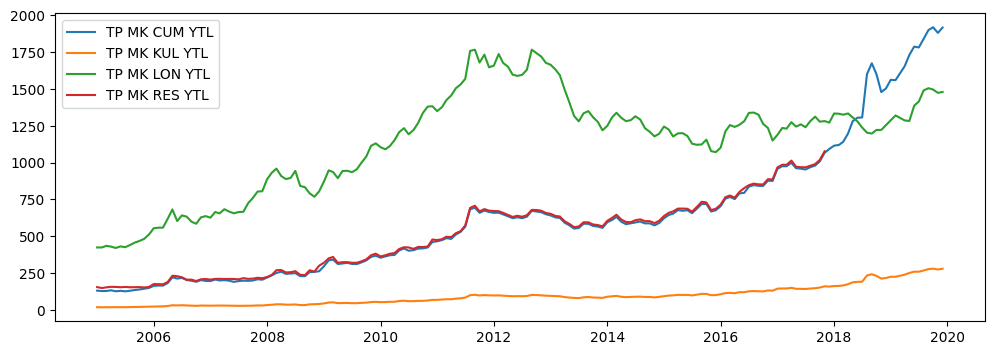

In [114]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df[df.columns[3:]], label=df.columns[3:])
plt.legend()
plt.show()

In [115]:
df.iloc[:, 3:].corr()

,TP MK CUM YTL,TP MK KUL YTL,TP MK LON YTL,TP MK RES YTL
TP MK CUM YTL,1.000000,0.999658,0.577602,0.999770
TP MK KUL YTL,0.999658,1.000000,0.587590,0.999668
TP MK LON YTL,0.577602,0.587590,1.000000,0.749965
TP MK RES YTL,0.999770,0.999668,0.749965,1.000000


In [116]:
file_name = 'gold_prices.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/gold_prices.csv'
# df = clean_gold_prices(read_path, drop_cols=True, save_path=save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,gold_price_cum,gold_price_lon
0,2005-01-01,2005,1,131.0,423.83
1,2005-02-01,2005,2,128.0,424.03
2,2005-03-01,2005,3,128.5,434.86
3,2005-04-01,2005,4,133.2,429.45
4,2005-05-01,2005,5,126.5,420.35


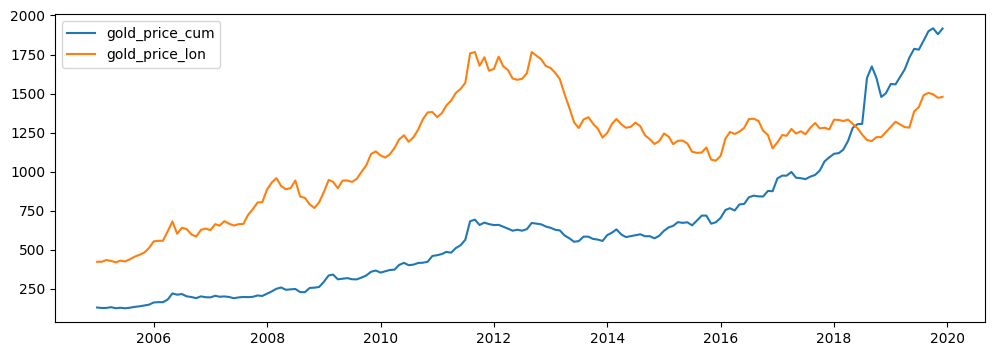

In [117]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df[df.columns[3:]], label=df.columns[3:])
plt.legend()
plt.show()

## InterBank Interest Rates
This data starts from 2011, therefore it will not be used.

In [130]:
file_name = 'InterBank Interest Rates.xlsx'
read_path = os.path.join(path_to_data, file_name)

In [131]:
df = pd.read_excel(read_path)
cond = df['Date'].str.fullmatch(r'\d\d\-\d\d\-\d\d\d\d').fillna(False)
df = df.loc[cond]

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.dropna()

In [132]:
print(f"Data range: {df['Date'].min()} --> {df['Date'].max()}")

Data range: 2011-01-07 00:00:00 --> 2019-02-08 00:00:00


In [133]:
df.head()

,Date,TP AOFO,TP IH
1831,2011-01-07,7.2,2870000000
1832,2011-01-10,6.77,1060000000
1833,2011-01-11,6.65,710000000
1834,2011-01-12,5.41,296000000
1835,2011-01-13,5.41,197000000


## Interest Rates
* Series Description:
    * TP.KTF10:	Personal (TRY)(Flow Data, %)-Level

In [151]:
def clean_interest_rates_personal(read_path, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)

    df = df.iloc[:, :2]
    df.columns = ['date', 'interest_rates_personal']

    cond = df['date'].str.fullmatch(r'\d\d\-\d\d\-\d\d\d\d').fillna(False)
    df = df.loc[cond]
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
    df = df.dropna()

    df['interest_rates_personal'] = df['interest_rates_personal'].astype('float')
    
    df.insert(1, 'year', df['date'].dt.year)
    df.insert(2, 'month', df['date'].dt.month)
    
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [156]:
file_name = 'InterestRates.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/interest_rates_personal.csv'
# df = clean_interest_rates_personal(read_path, save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,interest_rates_personal
0,2004-01-02,2004,1,33.86
1,2004-01-09,2004,1,35.62
2,2004-01-16,2004,1,32.98
3,2004-01-23,2004,1,31.97
4,2004-01-30,2004,1,32.68


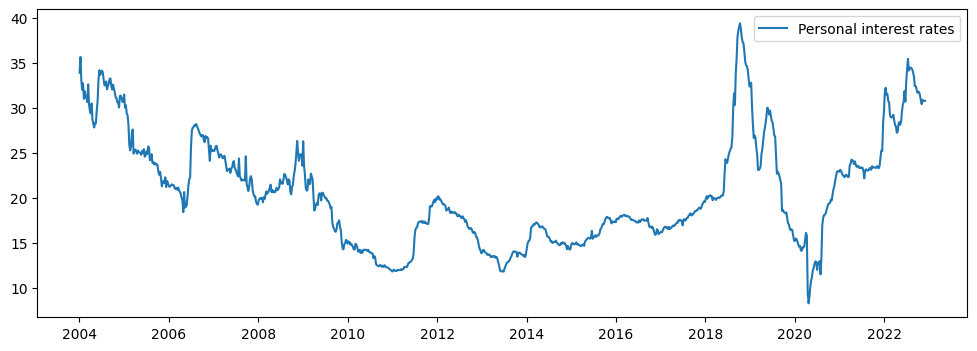

In [157]:
plt.figure(figsize=(12, 4))
plt.plot('date', 'interest_rates_personal', data=df, label='Personal interest rates')
plt.legend()
plt.show()

## Money supply data
This dataset has two columns:
* TP PBD H01
* TP PBD H09

Correlation is 0.99, so only one column is kept.

In [171]:
def clean_money_supply(read_path, drop_cols=False, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    
    df.columns = ['date', 'money_supply_H01', 'money_supply_H09']

    df.insert(1, 'year', df['date'].str[:4].astype('int'))
    df.insert(2, 'month', df['date'].str[5:].astype('int'))
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['day'])
    
    if drop_cols:
        df = df.drop(columns=['money_supply_H09'])
        df = df.rename(columns={'money_supply_H01': 'money_supply'})
        
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [173]:
file_name = 'money_supply_data.xlsx'
read_path = os.path.join(path_to_data, file_name)
df = clean_money_supply(read_path)

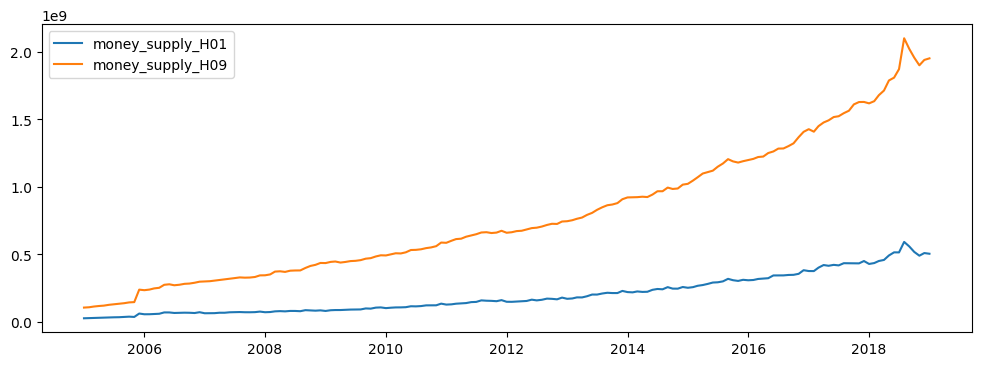

In [174]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df[['money_supply_H01', 'money_supply_H09']], label=['money_supply_H01', 'money_supply_H09'])
plt.legend()
plt.show()

In [175]:
df.iloc[:, 3:].corr()

,money_supply_H01,money_supply_H09
money_supply_H01,1.000000,0.996417
money_supply_H09,0.996417,1.000000


In [179]:
file_name = 'money_supply_data.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/money_supply.csv'
# df = clean_money_supply(read_path, drop_cols=True, save_path=save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,money_supply
0,2005-01-01,2005,1,26906087.0
1,2005-02-01,2005,2,28189500.0
2,2005-03-01,2005,3,29520606.0
3,2005-04-01,2005,4,31217625.0
4,2005-05-01,2005,5,31099565.0


## Mortgage credit interest rate

In [184]:
def clean_interest_rates_mortgage(read_path, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    
    df.columns = ['date', 'interest_rates_mortgage']

    df.insert(1, 'year', df['date'].str[:4].astype('int'))
    df.insert(2, 'month', df['date'].str[5:].astype('int'))
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['day'])
    
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [189]:
file_name = 'Mortgage credit interest rate.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/interest_rates_mortgage.csv'
# df = clean_interest_rates_mortgage(read_path, save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,interest_rates_mortgage
0,2005-01-01,2005,1,22.1125
1,2005-02-01,2005,2,20.4075
2,2005-03-01,2005,3,18.8600
3,2005-04-01,2005,4,18.2780
4,2005-05-01,2005,5,18.0425


## Real Effective Exchange Rate
* Series Descriptions	
    * **TP.RK.T1.Y**:	CPI Based Real Effective Exchange Rate (2003=100)-Level
    * **TP.RK.T2.Y**:	CPI Developing Countries Based Real Effective Exchange Rate (2003=100)-Level
    

The two variables are highly correlated (0.96), therefore only one variable will be kept.

In [202]:
def clean_real_effective_exchange_rates(read_path, drop_cols=False, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    df = df.rename(columns={'Date': 'date'})

    # Removing notes at hte end of file
    m = re.compile(r'\d\d\d\d\-\d\d')
    cond = df['date'].str.fullmatch(m).fillna(False)
    df = df.loc[cond].reset_index(drop=True)

    df.insert(1, 'year', df['date'].str[:4].astype('int'))
    df.insert(2, 'month', df['date'].str[5:].astype('int'))
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['day'])
    
    for col in df.columns[3:]:
        df[col] = df[col].astype('float')
        
    if drop_cols:
        df = df.drop(columns=['TP RK T1 Y'])
        df = df.rename(columns={'TP RK T2 Y': 'real_effective_echange_rates'})
        
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [203]:
file_name = 'Real Effective Exchange Rate.xlsx'
read_path = os.path.join(path_to_data, file_name)
df = clean_real_effective_exchange_rates(read_path)

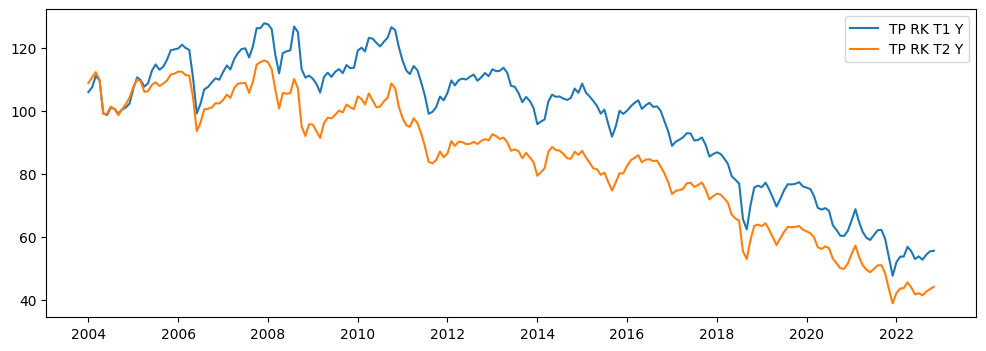

In [204]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df[['TP RK T1 Y', 'TP RK T2 Y']], label=['TP RK T1 Y', 'TP RK T2 Y'])
plt.legend()
plt.show()

In [205]:
df.iloc[:, 3:].corr()

,TP RK T1 Y,TP RK T2 Y
TP RK T1 Y,1.000000,0.962975
TP RK T2 Y,0.962975,1.000000


In [209]:
file_name = 'Real Effective Exchange Rate.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/real_effective_exchange_rates.csv'
# df = clean_real_effective_exchange_rates(read_path, drop_cols=True, save_path=save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,real_effective_echange_rates
0,2004-01-01,2004,1,108.82
1,2004-02-01,2004,2,110.59
2,2004-03-01,2004,3,112.25
3,2004-04-01,2004,4,109.81
4,2004-05-01,2004,5,99.04


## Retail Sales

In [22]:
def clean_retail_sales(read_path, fillna=False, save_path=None, save_data=False, return_data=True):
    
    df = pd.read_excel(read_path)
    df = df.iloc[:, :2]
    
    df.columns = ['date', 'retail_sales']

    # Removing notes at hte end of file
    m = re.compile(r'\d\d\d\d\-\d\d')
    cond = df['date'].str.fullmatch(m).fillna(False)
    df = df.loc[cond].reset_index(drop=True)

    df.insert(1, 'year', df['date'].str[:4].astype('int'))
    df.insert(2, 'month', df['date'].str[5:].astype('int'))
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['day'])
    
    cond = df['year'] > 2004
    df = df.loc[cond].reset_index(drop=True)
    
    for col in df.columns[3:]:
        df[col] = df[col].astype('float')
        
    # Interpolating missing data
    if fillna:
        df['retail_sales'] = df['retail_sales'].interpolate()
    
    # Saving data
    if save_data:
        assert save_path is not None, "Provide save_path"
        df.to_csv(save_path, index=False)
    
    if return_data:
        return df

In [23]:
file_name = 'RetailSales.xlsx'
read_path = os.path.join(path_to_data, file_name)
df = clean_retail_sales(read_path)

There are 33 missing data points in this dataset, they will be filled by interpolation.

In [24]:
df.isna().sum()

date             0
year             0
month            0
retail_sales    33
dtype: int64

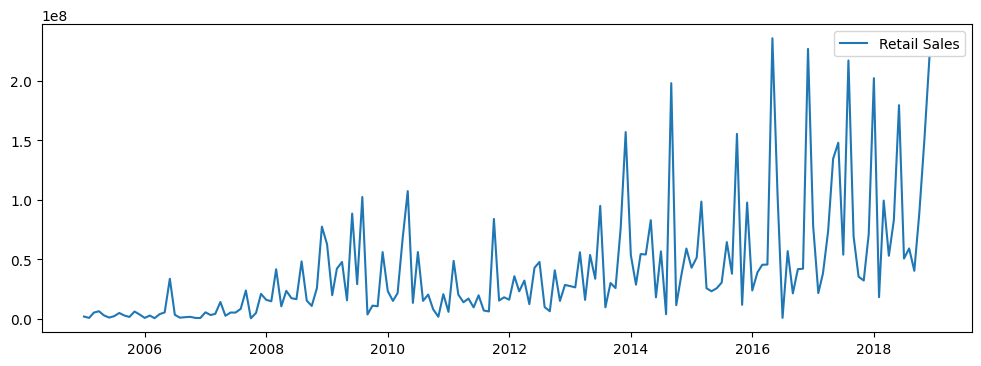

In [25]:
plt.figure(figsize=(12, 4))
plt.plot('date', 'retail_sales', data=df, label='Retail Sales')
plt.legend()
plt.show()

In [31]:
file_name = 'RetailSales.xlsx'
read_path = os.path.join(path_to_data, file_name)

save_path = 'cleaned_data/retail_sales.csv'
# df = clean_retail_sales(read_path, fillna=True, save_path=save_path, save_data=True)

df = pd.read_csv(save_path, parse_dates=['date'])
df.head()

,date,year,month,retail_sales
0,2005-01-01,2005,1,1862316.0
1,2005-02-01,2005,2,709424.0
2,2005-03-01,2005,3,5160277.0
3,2005-04-01,2005,4,6321035.0
4,2005-05-01,2005,5,2809651.0
